# * Topic: Deep Learning Challenges  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

##  2.	Build a ANN model to predict whether a customer will churn or not. Use the attached dataset(Churn_Modelling.csv)

## -----------------------------------------------------------------------------------

### Problem Objective:
### The main objective of data set is to predict whether a customer will churn or not using a simple ANN model.

### Dataset Description:

The data set includes information about:
* Customers who left within the last month – the column is called Churn


* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


* Demographic info about customers – gender, age range, and if they have partners and dependents

## import libraries:

In [48]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns

## import dataset:

In [49]:
df = pd.read_csv(r"G:\360digit\AI&DL\Assignments\5. Deep learning Challenges\Churn_Modelling.csv")

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA:

In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
df[['Exited']].value_counts().to_frame()

,0
Exited,
0,7963
1,2037


In [53]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [54]:
df.shape

(10000, 14)

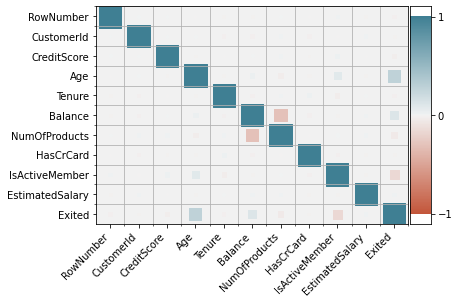

In [55]:
from heatmap import heatmap, corrplot
corrplot(df.corr(), size_scale=500, marker='s')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
df = df.drop(["RowNumber", "CustomerId", "Surname" ], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df["Gender"] = enc.fit_transform(df["Gender"])
df["Geography"] = enc.fit_transform(df["Geography"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Choosing X and y:

In [61]:
X = df.drop('Exited',axis = 1)
y = df['Exited']

### Scaling the data;

In [62]:
from sklearn.preprocessing import scale
X = scale(X)

### Train/Test Split:

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [66]:
X_train

array([[-0.32622142,  1.51506738, -1.09598752, ...,  0.64609167,
         0.97024255,  1.26421844],
       [-0.0778988 ,  0.30659057, -1.09598752, ..., -1.54776799,
         0.97024255,  1.53793314],
       [-0.92633441, -0.90188624,  0.91241915, ..., -1.54776799,
        -1.03067011,  1.27965918],
       ...,
       [ 0.87400456, -0.90188624, -1.09598752, ..., -1.54776799,
        -1.03067011, -0.13685352],
       [ 0.17042381, -0.90188624,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.04490188],
       [ 0.48082708,  0.30659057,  0.91241915, ...,  0.64609167,
         0.97024255, -0.80874677]])

## Modelling:

In [70]:
model = Sequential()
model.add(Dense(12, input_dim = 10, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [71]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model:

In [72]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=10)

Epoch 1/100
700/700 [==============================] - 1s 877us/step - loss: 0.4977 - accuracy: 0.7673
Epoch 2/100
700/700 [==============================] - 1s 760us/step - loss: 0.4357 - accuracy: 0.8049
Epoch 3/100
700/700 [==============================] - 1s 781us/step - loss: 0.4190 - accuracy: 0.8167
Epoch 4/100
700/700 [==============================] - 1s 911us/step - loss: 0.4021 - accuracy: 0.8233
Epoch 5/100
700/700 [==============================] - 1s 782us/step - loss: 0.3906 - accuracy: 0.8250
Epoch 6/100
700/700 [==============================] - 1s 743us/step - loss: 0.3844 - accuracy: 0.8256
Epoch 7/100
700/700 [==============================] - 0s 711us/step - loss: 0.3791 - accuracy: 0.8244
Epoch 8/100
700/700 [==============================] - 0s 703us/step - loss: 0.3757 - accuracy: 0.8396
Epoch 9/100
700/700 [==============================] - 1s 961us/step - loss: 0.3724 - accuracy: 0.8477
Epoch 10/100
700/700 [==============================] - 1s 797us/step - l

700/700 [==============================] - 0s 619us/step - loss: 0.3326 - accuracy: 0.8604
Epoch 80/100
700/700 [==============================] - 0s 636us/step - loss: 0.3326 - accuracy: 0.8597
Epoch 81/100
700/700 [==============================] - 1s 750us/step - loss: 0.3320 - accuracy: 0.8593
Epoch 82/100
700/700 [==============================] - 0s 671us/step - loss: 0.3318 - accuracy: 0.8593
Epoch 83/100
700/700 [==============================] - 0s 656us/step - loss: 0.3314 - accuracy: 0.8630
Epoch 84/100
700/700 [==============================] - 0s 653us/step - loss: 0.3325 - accuracy: 0.8609
Epoch 85/100
700/700 [==============================] - 0s 639us/step - loss: 0.3316 - accuracy: 0.8626
Epoch 86/100
700/700 [==============================] - 0s 627us/step - loss: 0.3318 - accuracy: 0.8606
Epoch 87/100
700/700 [==============================] - 0s 646us/step - loss: 0.3316 - accuracy: 0.8611
Epoch 88/100
700/700 [==============================] - 0s 657us/step - loss:

### Prediction:

In [73]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.8053333333333333

### Evaluation:

    * Plotting Loss against  no of epochs

Text(0, 0.5, 'Loss')

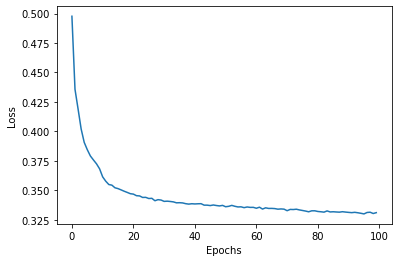

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Evaluation:

    * Plotting Loss against  no of epochs

Text(0, 0.5, 'Loss')

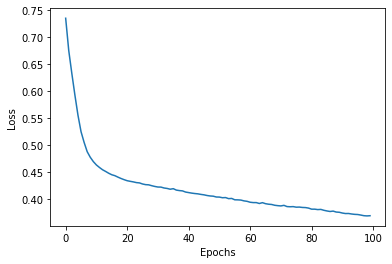

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Prediction:

In [75]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.8053333333333333